                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

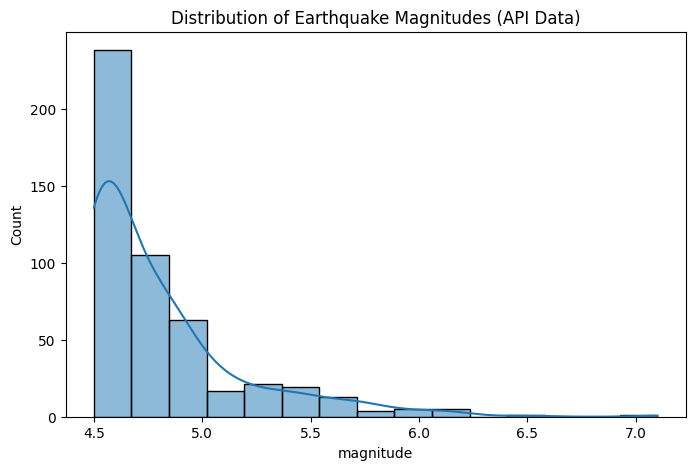

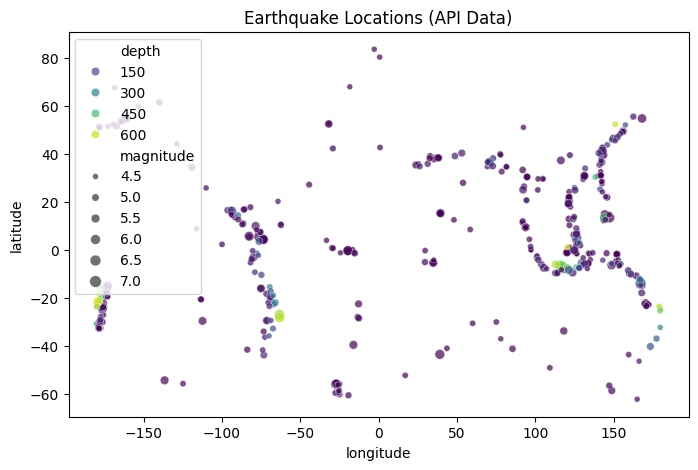

In [ ]:
# earthquake_api_analysis.py
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

# --- EDA ---
print(df_api.describe())
print(df_api.info())

# --- Visualizations ---
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()



Please upload your CSV file (Significant_Earthquakes.csv)


Saving Significant_Earthquakes.csv to Significant_Earthquakes (4).csv
Columns in the CSV:
['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']

Numeric Summary:
                                Date      Latitude     Longitude  \
count                          23409  23409.000000  23409.000000   
mean   1993-02-18 12:19:39.880815104      1.678763     39.636726   
min              1965-01-02 13:44:18    -77.080000   -179.997000   
25%              1981-04-11 05:29:33    -18.652000    -76.352000   
50%              1993-11-30 20:44:13     -3.569000    103.981000   
75%              2005-09-09 19:55:22     26.188000    145.027000   
max              2016-12-30 20:08:28     86.005000    179.998000   
std                    

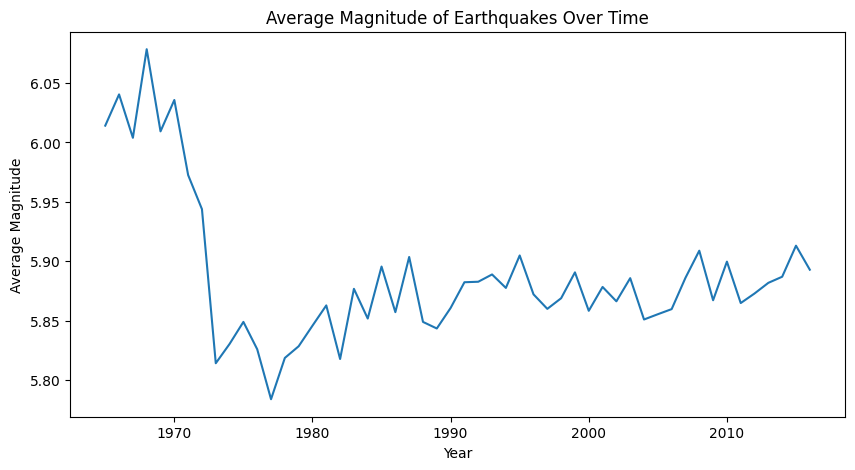

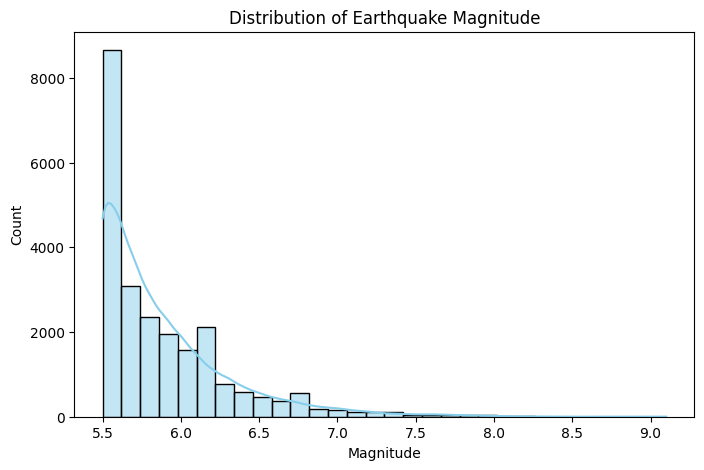

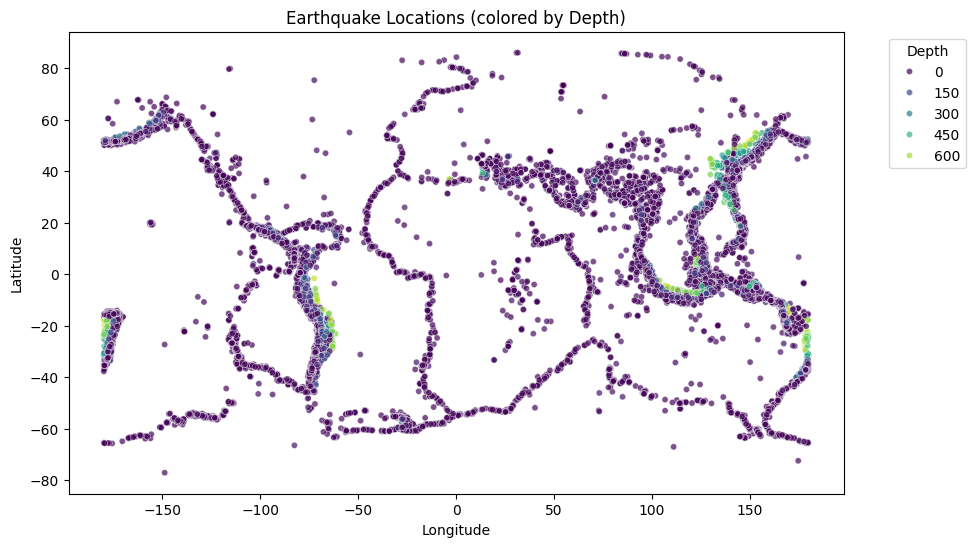

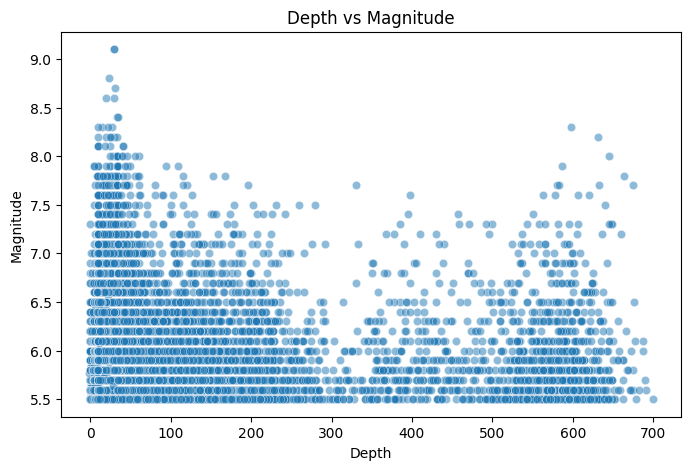

In [ ]:
# Step 0: Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload CSV directly
print("Please upload your CSV file (Significant_Earthquakes.csv)")
uploaded = files.upload()

# Load CSV into DataFrame
file_name = list(uploaded.keys())[0]
df_hist = pd.read_csv(file_name)

# Step 2: Show columns in CSV
print("Columns in the CSV:")
print(df_hist.columns.tolist())

# --- Step 3: Combine Date + Time into datetime ---
df_hist['Datetime'] = pd.to_datetime(
    df_hist['Date'] + ' ' + df_hist['Time'], errors='coerce'
)

# --- Step 4: Select relevant columns ---
df_hist = df_hist[['Datetime', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location Source']]

# Rename columns
df_hist = df_hist.rename(columns={
    'Datetime': 'Date',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Depth': 'Depth',
    'Magnitude': 'Magnitude',
    'Location Source': 'Location'
})

# Drop missing values
df_hist = df_hist.dropna()

# --- Step 5: Numeric summary ---
print("\nNumeric Summary:")
print(df_hist.describe())

# --- Step 6: Missing values ---
print("\nMissing Values:")
print(df_hist.isnull().sum())
print(df_hist.isnull().sum().dtype)

# --- Step 7: Time series trend (average magnitude per year) ---
df_hist['Year'] = df_hist['Date'].dt.year
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_hist.groupby('Year')['Magnitude'].mean().reset_index(),
    x='Year', y='Magnitude'
)
plt.title("Average Magnitude of Earthquakes Over Time")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.show()

# --- Step 8: Histogram of Magnitude ---
plt.figure(figsize=(8,5))
sns.histplot(df_hist['Magnitude'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

# --- Step 9: Scatter plot Latitude vs Longitude colored by Depth ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_hist, x='Longitude', y='Latitude',
    hue='Depth', palette='viridis', alpha=0.7, s=20
)
plt.title("Earthquake Locations (colored by Depth)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Depth', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# --- Step 10: Scatter plot Depth vs Magnitude ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x='Depth', y='Magnitude', alpha=0.5)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()


➡️ Upload your Earthquake CSV file (e.g., Significant_Earthquakes.csv)


Saving Significant_Earthquakes.csv to Significant_Earthquakes.csv
✅ Uploaded: Significant_Earthquakes.csv

➡️ Upload your Soil ZIP shapefile (e.g., DSMW.zip)


Saving DSMW.zip to DSMW.zip
✅ Uploaded: DSMW.zip
📂 Extracted files: ['DSMW.shp', 'SU_Info.xls', 'BasicFilesSC.xls', 'DSMW.lyr', 'WORLD764.xls', 'readme.doc', 'DSMW.shp.xml', 'DSMW.sbn', 'Generalized_SU_Info.xls', 'DSMW.shx', 'DSMW_noborder.lyr', 'DSMW.sbx', 'DSMW.dbf', 'SoilData.doc']
✅ Earthquake CSV loaded!
         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN   

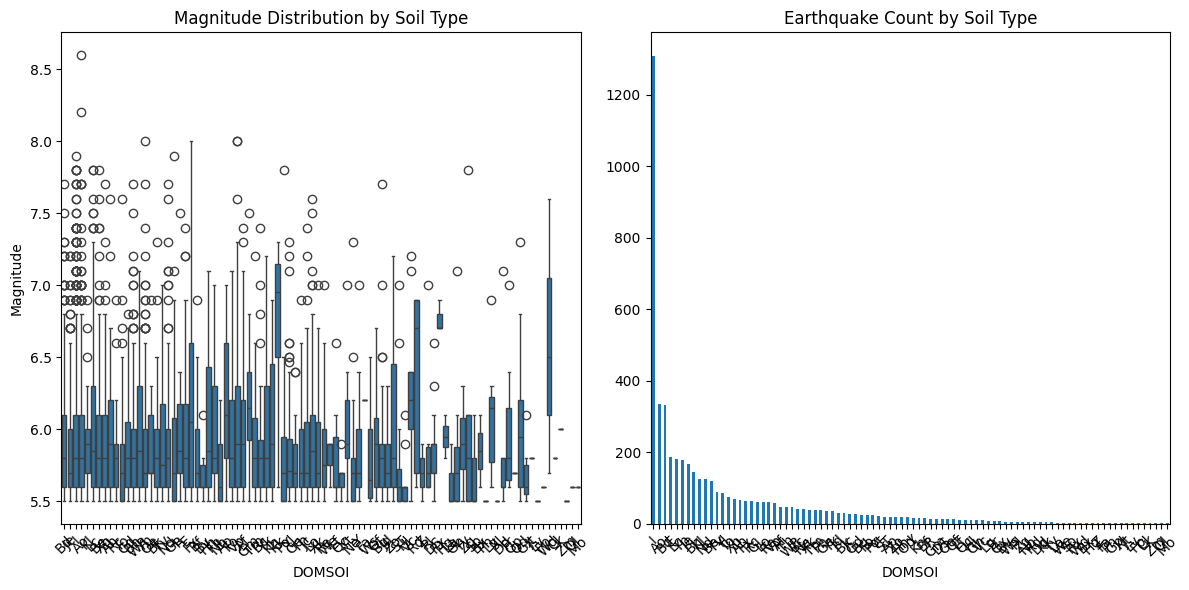

/tmp/ipython-input-803636840.py:155: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


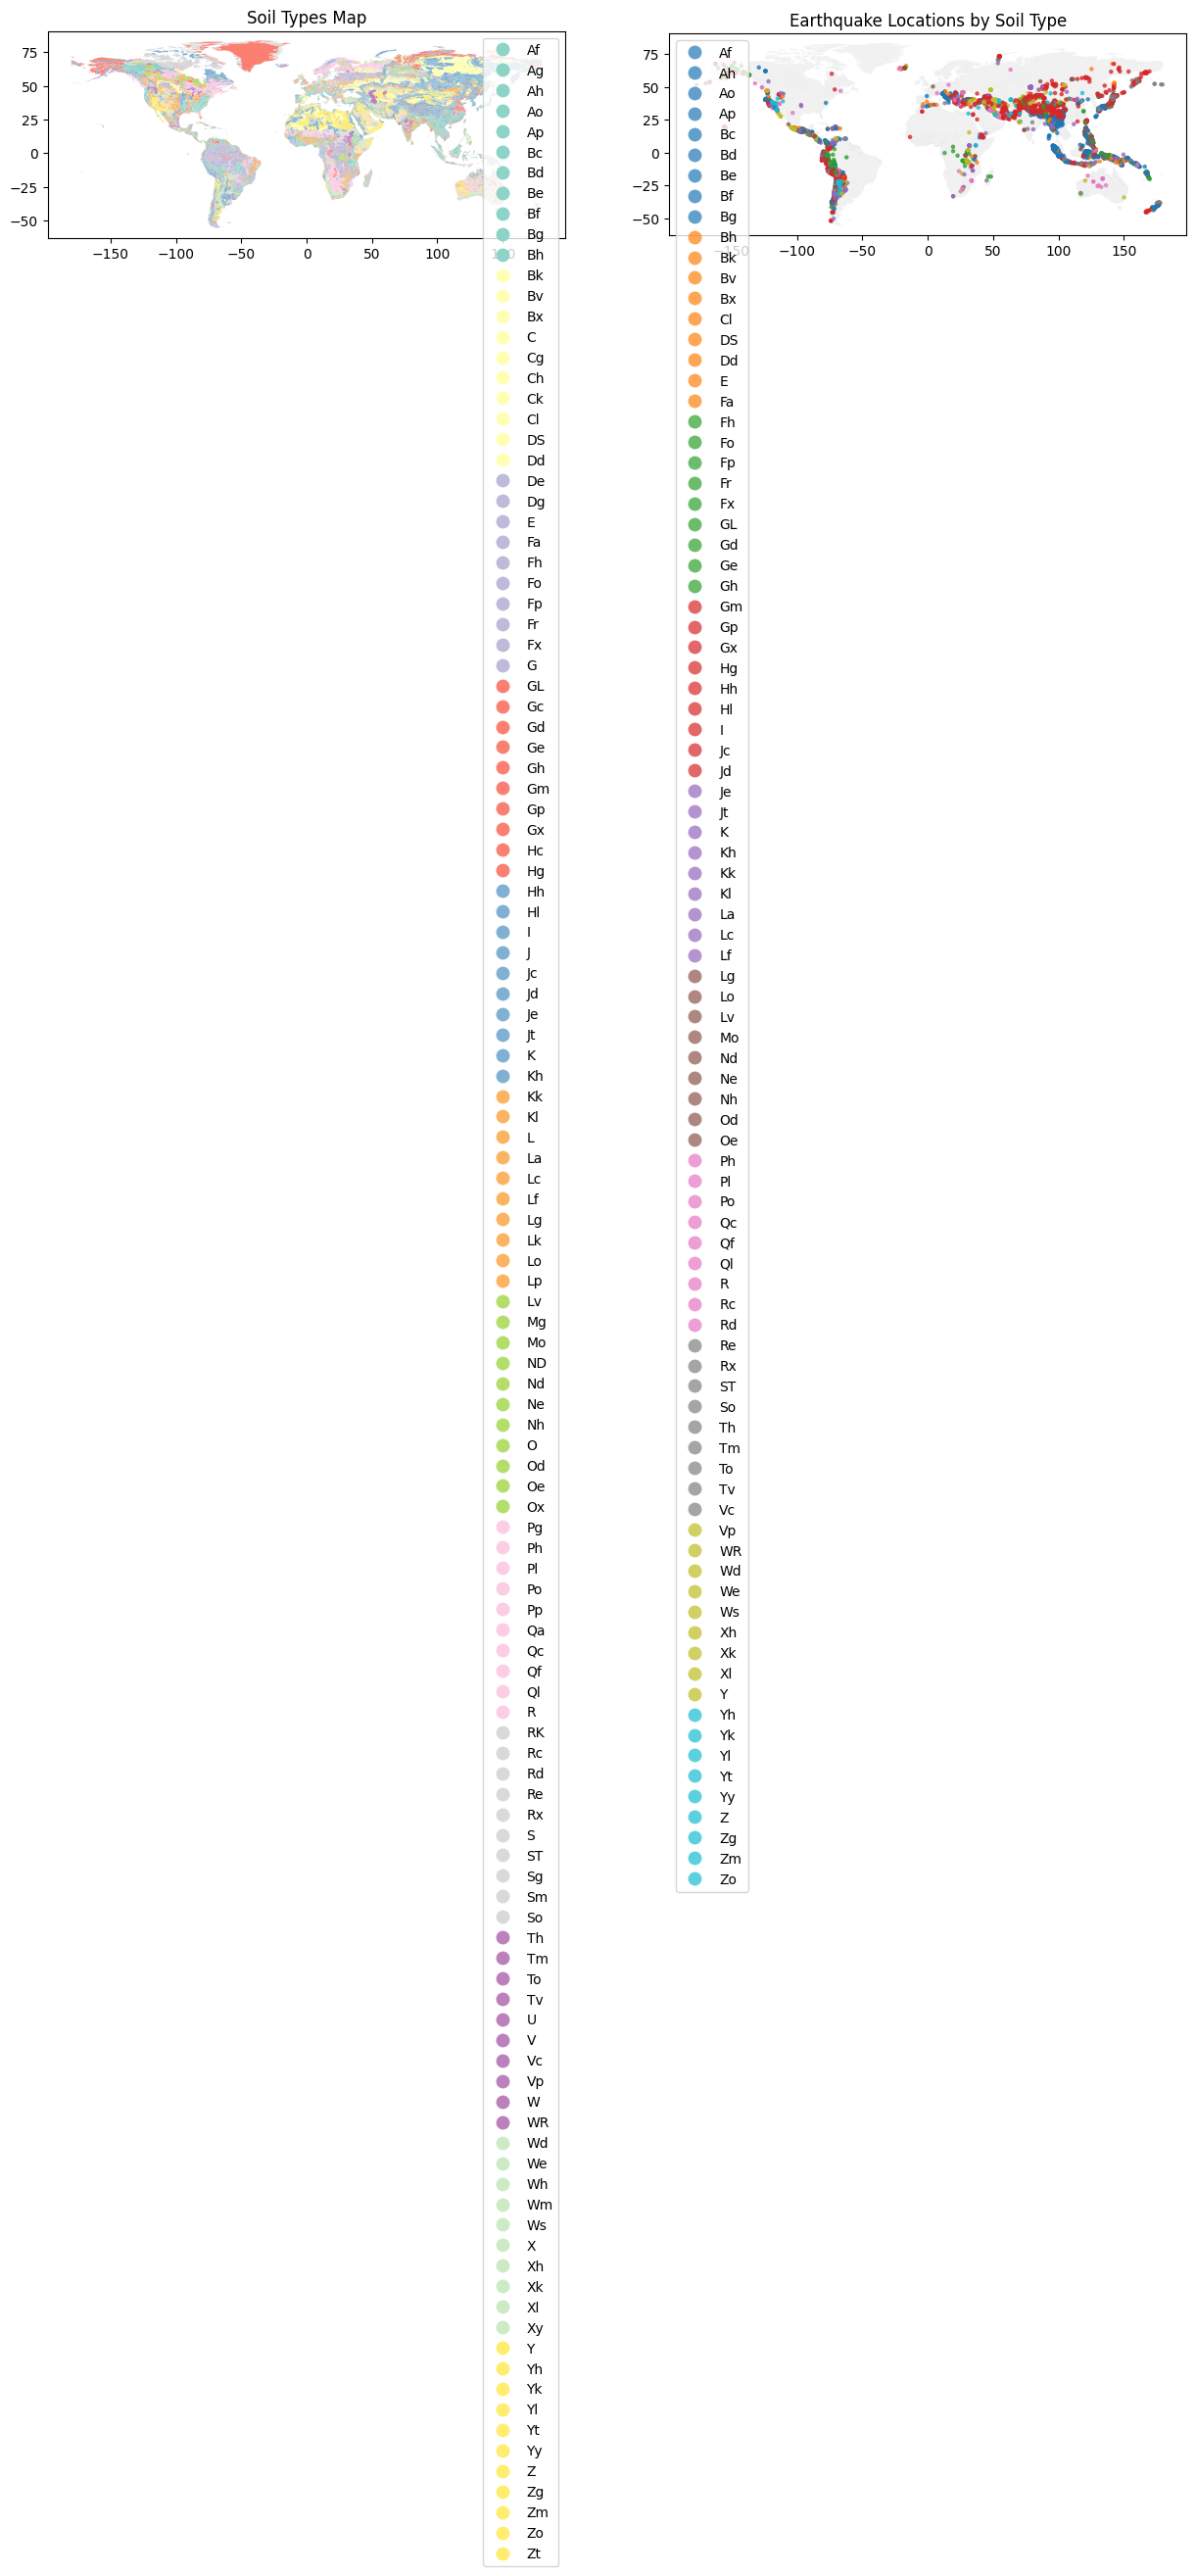


📊 Statistical summary by soil type:
        count      mean       std  min  max
DOMSOI                                     
Af         47  5.987234  0.492825  5.5  7.4
Ah         67  5.968657  0.466843  5.5  7.6
Ao        335  5.921582  0.484493  5.5  8.6
Ap         19  6.163158  0.479827  5.5  7.0
Bc         40  5.880000  0.424989  5.5  7.4
...       ...       ...       ...  ...  ...
Yy          4  5.900000  0.336650  5.5  6.3
Z           2  5.700000  0.282843  5.5  5.9
Zg          5  6.140000  0.960729  5.5  7.8
Zm          1  5.500000       NaN  5.5  5.5
Zo         19  6.042105  0.557091  5.5  7.2

[90 rows x 5 columns]


In [ ]:
# ==========================================================
# 📦 Install + Import libraries
# ==========================================================
!pip install geopandas shapely seaborn matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
from google.colab import files
import zipfile, os

# ==========================================================
# 1️⃣ Upload your datasets from laptop
# ==========================================================
print("➡️ Upload your Earthquake CSV file (e.g., Significant_Earthquakes.csv)")
uploaded = files.upload()

eq_csv = list(uploaded.keys())[0]
print("✅ Uploaded:", eq_csv)

print("\n➡️ Upload your Soil ZIP shapefile (e.g., DSMW.zip)")
uploaded_soil = files.upload()
soil_zip = list(uploaded_soil.keys())[0]
print("✅ Uploaded:", soil_zip)

# ==========================================================
# 2️⃣ Extract soil shapefile ZIP
# ==========================================================
extract_folder = "soil_data"
with zipfile.ZipFile(soil_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("📂 Extracted files:", os.listdir(extract_folder))

# ==========================================================
# 3️⃣ Load earthquake CSV
# ==========================================================
df_hist = pd.read_csv(eq_csv)
print("✅ Earthquake CSV loaded!")
print(df_hist.head())

# ==========================================================
# 4️⃣ Function to load soil data
# ==========================================================
def load_soil_data(folder_path):
    """Load soil shapefile from extracted folder"""
    try:
        shp_file = None
        for file in os.listdir(folder_path):
            if file.endswith(".shp"):
                shp_file = os.path.join(folder_path, file)
                break
        if shp_file is None:
            raise FileNotFoundError("No .shp file found in the extracted folder!")

        soil_data = gpd.read_file(shp_file)

        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# ==========================================================
# 5️⃣ Load soil data
# ==========================================================
soil_data = load_soil_data(extract_folder)

if soil_data is not None:
    print("✅ Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil polygons: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")

    # ==========================================================
    # 6️⃣ Choose best soil column
    # ==========================================================
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]

    if available_soil_cols:
        soil_column = available_soil_cols[0]
        print(f"🟢 Using soil column: {soil_column}")
    else:
        raise ValueError("No valid soil column found in DSMW data.")

    # ==========================================================
    # 7️⃣ Convert earthquake data to GeoDataFrame
    # ==========================================================
    eq_points = gpd.GeoDataFrame(
        df_hist,
        geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
        crs="EPSG:4326"
    )

    # Ensure both datasets have same CRS
    soil_data = soil_data.to_crs(eq_points.crs)

    # ==========================================================
    # 8️⃣ Spatial join (earthquake + soil)
    # ==========================================================
    eq_with_soil = gpd.sjoin(
        eq_points,
        soil_data[[soil_column, 'geometry']],
        how="left",
        predicate='within'
    )

    # ==========================================================
    # 9️⃣ Summary info
    # ==========================================================
    print(f"\nTotal earthquakes: {len(eq_points)}")
    print(f"Earthquakes with soil data: {eq_with_soil[soil_column].notna().sum()}")
    print(f"Earthquakes without soil data: {eq_with_soil[soil_column].isna().sum()}")

    # ==========================================================
    # 🔍 10️⃣ EDA: Magnitude vs Soil Type
    # ==========================================================
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = eq_with_soil[soil_column].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # 🌎 11️⃣ Map visualization
    # ==========================================================
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Soil map
    soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
    ax1.set_title("Soil Types Map")

    # Earthquakes on top of soil map
    soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
    eq_with_soil.plot(ax=ax2, column=soil_column, legend=True, markersize=5, alpha=0.7)
    ax2.set_title("Earthquake Locations by Soil Type")

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # 📊 12️⃣ Statistical summary
    # ==========================================================
    print("\n📊 Statistical summary by soil type:")
    stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
    print(stats_by_soil)

else:
    print("❌ Failed to load soil data.")


📁 Please upload your earthquake CSV file:


Saving unified_earthquake_data.csv to unified_earthquake_data (4).csv
📁 Please upload your soil ZIP shapefile (e.g., DSMW.zip):


Saving DSMW.zip to DSMW (5).zip
✅ Earthquake data loaded: (23409, 8)
         Date  Latitude  Longitude  Depth  Magnitude      Source DOMSOI  Year
0  1965-01-02    19.246    145.616  131.6        6.0  Historical    NaN  1965
1  1965-01-04     1.863    127.352   80.0        5.8  Historical    NaN  1965
2  1965-01-05   -20.579   -173.972   20.0        6.2  Historical    NaN  1965
3  1965-01-08   -59.076    -23.557   15.0        5.8  Historical    NaN  1965
4  1965-01-09    11.938    126.427   15.0        5.8  Historical    NaN  1965
✅ Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
🧭 Using soil column: DOMSOI

✅ Spatial join complete!
🧭 Using soil column for analysis: DOMSOI_right

Missing values per column:
Date                0
Latitude            0
Longitude           0
Depth               0
Magnitude           0
Source              0
DOMSOI_left     18482

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

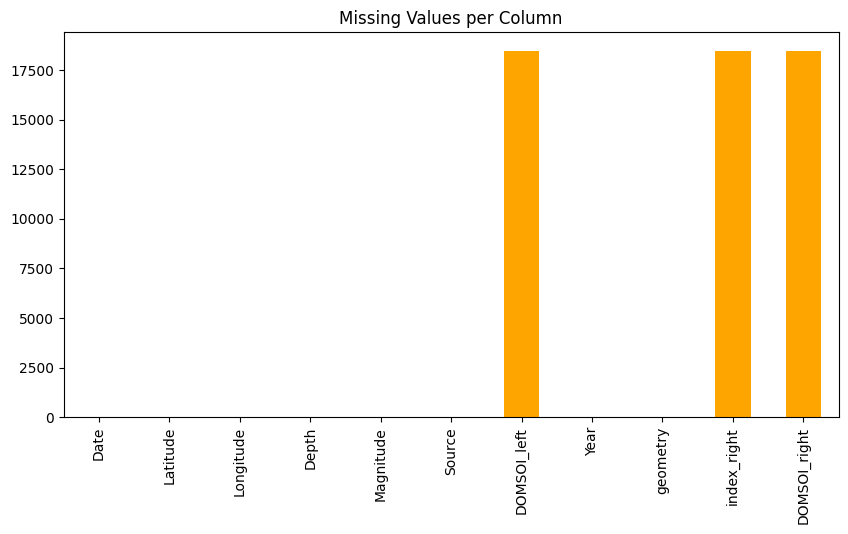

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

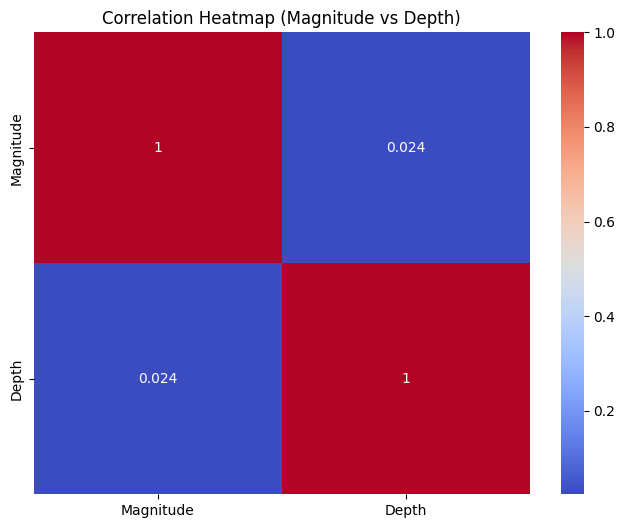

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

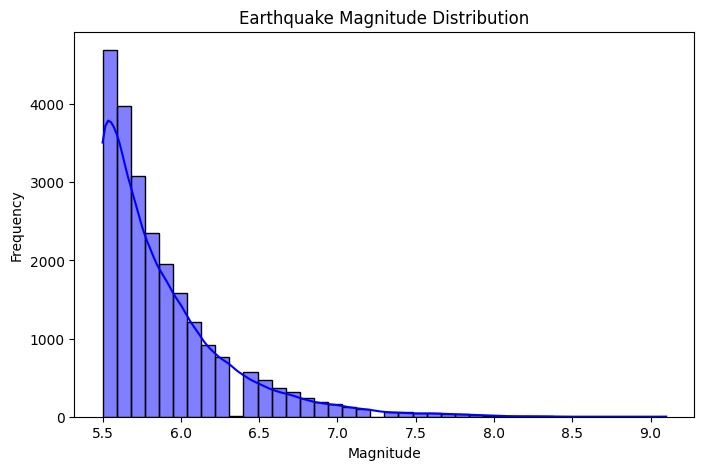

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

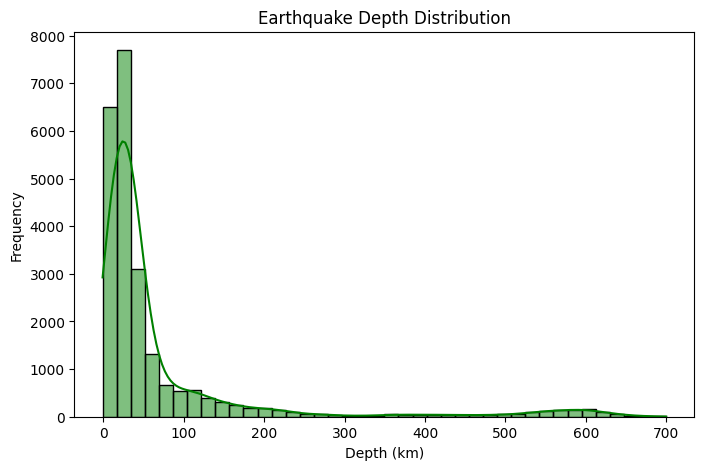

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

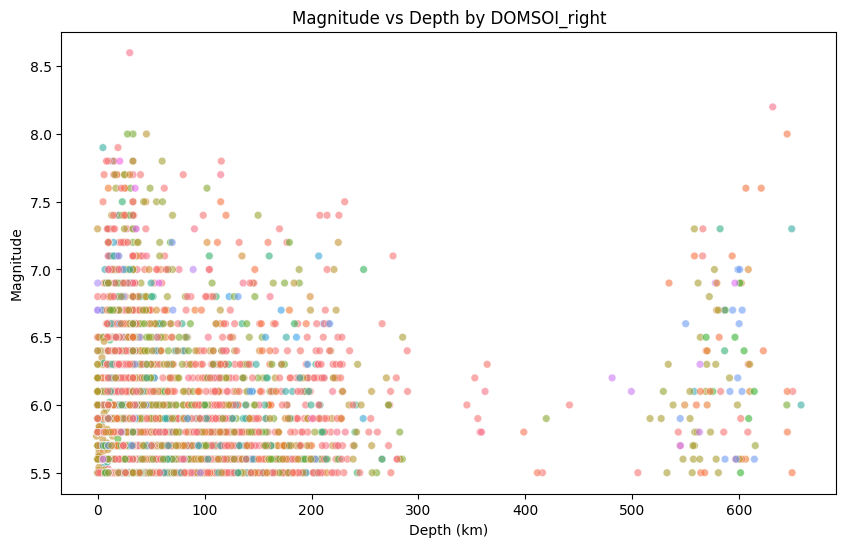

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

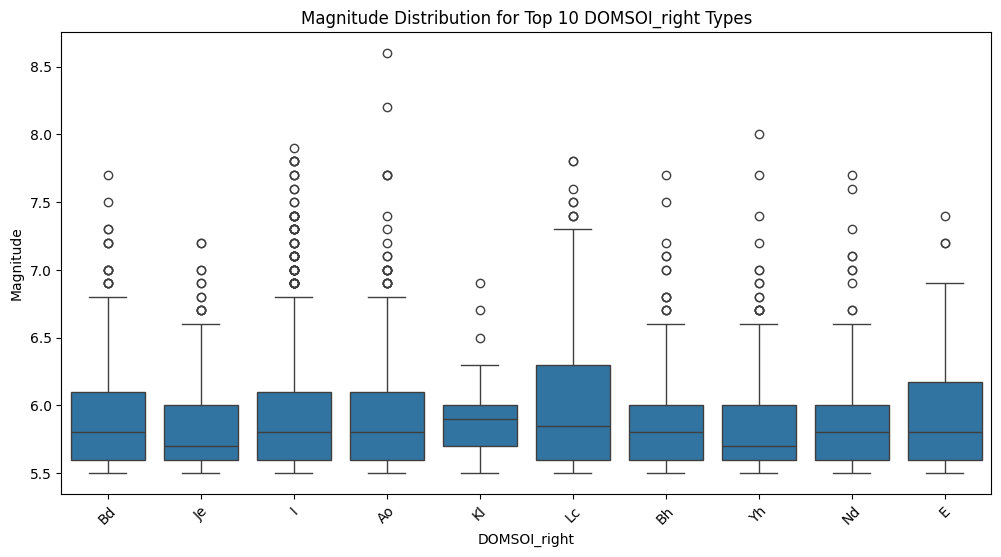

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

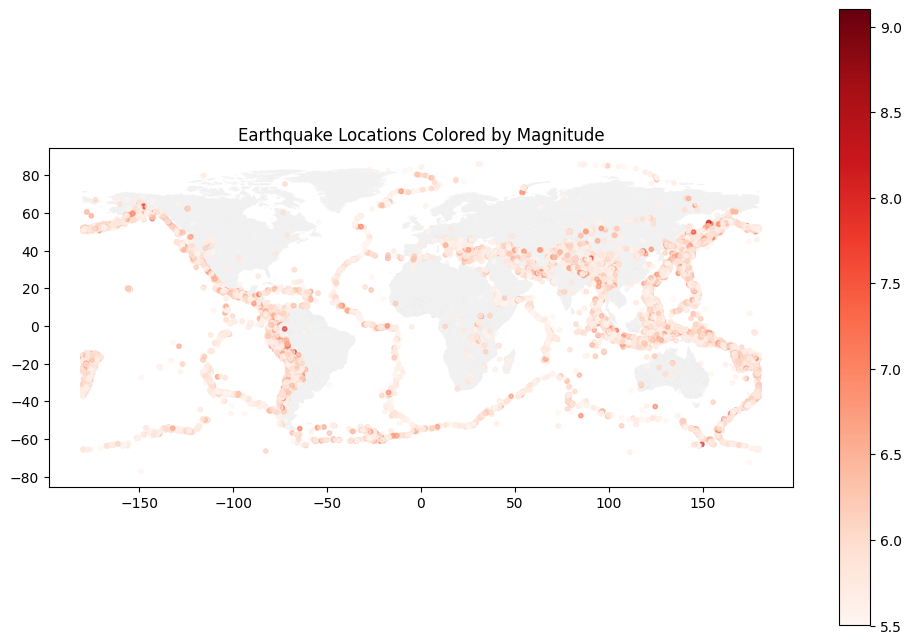

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Summary saved and ready to download as 'soil_earthquake_summary.csv'

🔥 Top 5 soil types with highest average magnitude:
              count      mean       std  min  max
DOMSOI_right                                     
Rx                3  6.766667  0.115470  6.7  6.9
Kk                4  6.700000  0.761577  5.6  7.3
Wd                3  6.600000  0.953939  5.7  7.6
Rd                5  6.360000  0.654217  5.6  6.9
Vc                9  6.277778  0.562978  5.5  7.2


In [ ]:
# ==========================================================
# 🌍 Soil–Earthquake Data Analysis & EDA (Manual Upload + Download)
# ==========================================================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import os
from google.colab import files
import zipfile

# --- Step 1: Upload your files manually ---
print("📁 Please upload your earthquake CSV file:")
uploaded_eq = files.upload()
eq_csv_path = list(uploaded_eq.keys())[0]

print("📁 Please upload your soil ZIP shapefile (e.g., DSMW.zip):")
uploaded_soil = files.upload()
soil_zip_filename = list(uploaded_soil.keys())[0]

# --- Step 2: Extract soil shapefile ---
with zipfile.ZipFile(soil_zip_filename, 'r') as zip_ref:
    zip_ref.extractall('soil_data')

# --- Step 3: Load Earthquake Data ---
df_hist = pd.read_csv(eq_csv_path)
print("✅ Earthquake data loaded:", df_hist.shape)
print(df_hist.head())

# --- Step 4: Load Soil Data ---
soil_files = [f for f in os.listdir('soil_data') if f.endswith('.shp')]
if not soil_files:
    raise FileNotFoundError("❌ No .shp file found in uploaded soil data!")

soil_shp_path = os.path.join('soil_data', soil_files[0])
soil_data = gpd.read_file(soil_shp_path)

if soil_data.crs is None:
    soil_data = soil_data.set_crs("EPSG:4326")
print("✅ Soil data loaded successfully!")
print("Columns:", list(soil_data.columns))

# --- Step 5: Choose main soil column automatically ---
possible_cols = ['DOMSOI', 'FAOSOIL', 'SU_SYM90', 'SU_SYM85', 'SOIL', 'CODE']
soil_column = next((col for col in possible_cols if col in soil_data.columns), None)
if not soil_column:
    raise ValueError("❌ No valid soil column found!")
print(f"🧭 Using soil column: {soil_column}")

# --- Step 6: Convert earthquake DataFrame to GeoDataFrame ---
eq_points = gpd.GeoDataFrame(
    df_hist,
    geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
    crs="EPSG:4326"
)

soil_data = soil_data.to_crs(eq_points.crs)

# --- Step 7: Spatial Join ---
eq_with_soil = gpd.sjoin(
    eq_points,
    soil_data[[soil_column, 'geometry']],
    how="left",
    predicate="within"
)
print("\n✅ Spatial join complete!")

# --- Step 7b: Fix soil column after join (avoid KeyError) ---
if soil_column not in eq_with_soil.columns:
    possible_suffix = soil_column + "_right"
    if possible_suffix in eq_with_soil.columns:
        soil_column = possible_suffix
    else:
        # fallback: pick any existing column containing "SOIL"
        for col in eq_with_soil.columns:
            if "SOIL" in col.upper():
                soil_column = col
                break
print(f"🧭 Using soil column for analysis: {soil_column}")

# --- Step 8: Missing Values ---
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# --- Function to save and download plot ---
def save_and_download(fig, filename):
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    files.download(filename)

# ==========================================================
# --- EDA (Exploratory Data Analysis) ---
# ==========================================================

# 1️⃣ Missing Values Bar Plot
fig = plt.figure(figsize=(10,5))
eq_with_soil.isna().sum().plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
save_and_download(fig, "missing_values.png")
plt.show()

# 2️⃣ Correlation Heatmap
fig = plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
save_and_download(fig, "correlation_heatmap.png")
plt.show()

# 3️⃣ Magnitude Histogram
fig = plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
save_and_download(fig, "magnitude_histogram.png")
plt.show()

# 4️⃣ Depth Histogram
fig = plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
save_and_download(fig, "depth_histogram.png")
plt.show()

# 5️⃣ Magnitude vs Depth Scatter (colored by soil type)
fig = plt.figure(figsize=(10,6))
valid_rows = eq_with_soil.dropna(subset=[soil_column])
sample_size = min(5000, len(valid_rows))  # ✅ Fixed sampling
sample_df = valid_rows.sample(sample_size, random_state=42)
sns.scatterplot(data=sample_df, x="Depth", y="Magnitude", hue=soil_column, alpha=0.6, s=30, legend=False)
plt.title(f"Magnitude vs Depth by {soil_column}")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
save_and_download(fig, "magnitude_vs_depth.png")
plt.show()

# 6️⃣ Top 10 Soil Types vs Magnitude
fig = plt.figure(figsize=(12,6))
top_soils = eq_with_soil[soil_column].value_counts().head(10).index
sns.boxplot(data=eq_with_soil[eq_with_soil[soil_column].isin(top_soils)],
            x=soil_column, y="Magnitude")
plt.title(f"Magnitude Distribution for Top 10 {soil_column} Types")
plt.xticks(rotation=45)
save_and_download(fig, "top10_soil_magnitude.png")
plt.show()

# 7️⃣ Map: Earthquakes colored by magnitude
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(ax=ax, column="Magnitude", cmap="Reds", markersize=10, alpha=0.6, legend=True)
ax.set_title("Earthquake Locations Colored by Magnitude")
save_and_download(fig, "earthquake_magnitude_map.png")
plt.show()

# ==========================================================
# --- Save Statistical Summary and Download ---
# ==========================================================
summary = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count','mean','std','min','max'])
summary.to_csv("soil_earthquake_summary.csv")
files.download("soil_earthquake_summary.csv")
print("\n✅ Summary saved and ready to download as 'soil_earthquake_summary.csv'")

# --- Top 5 soil types with highest mean magnitude ---
top5 = summary.sort_values("mean", ascending=False).head(5)
print("\n🔥 Top 5 soil types with highest average magnitude:")
print(top5)


📁 Upload Historical Earthquake CSV


Saving Earthquakes_with_Soil.csv to Earthquakes_with_Soil (1).csv
Loaded Historical dataset: (23412, 24)

📁 Upload Soil ZIP shapefile (optional)


Saving DSMW.zip to DSMW (6).zip
Found Soil shapefile: DSMW (6).zip

📁 Upload API dataset CSV (optional)


Saving unified_earthquake_data.csv to unified_earthquake_data (5).csv
Loaded API dataset: (23409, 8)
Soil data loaded: 34112 polygons, columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Using soil column: DOMSOI

Unified dataset shape: (46818, 7)

=== BASIC STATISTICS ===
                                 Date      Latitude     Longitude  \
count                           46818  46818.000000  46818.000000   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    1993-02-18 00:22:56.701268736      1.678763     39.636726   
min               1965-01-02 00:00:00    -77.080000   -179.997000   
25%               1981-04-11 00:00:00    -18.652000    -76.352000   
50%               1993-11-30 00:00:00     -3.569000    103.981000   
75%      

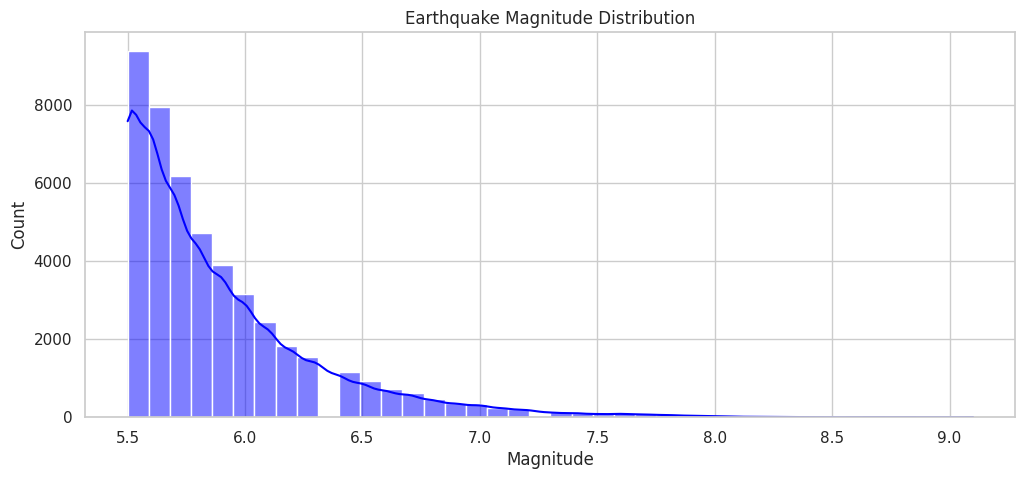

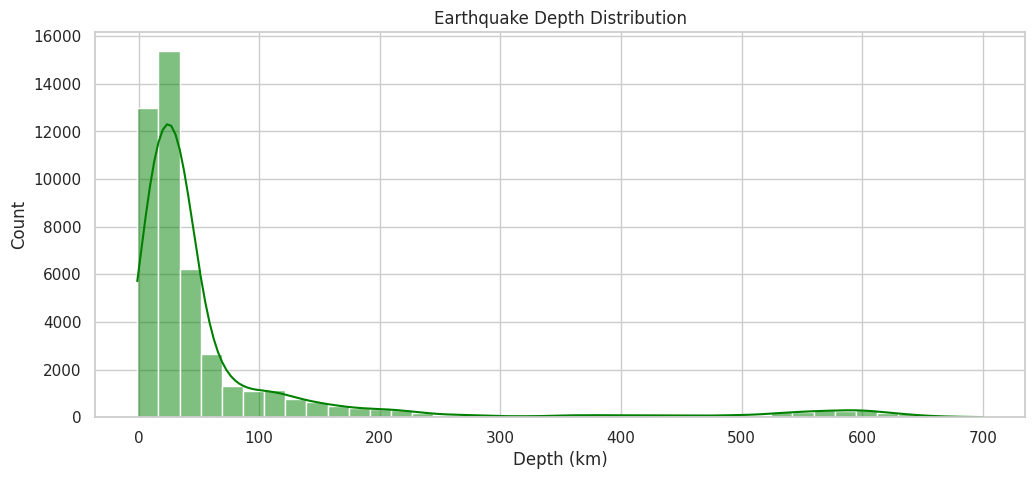

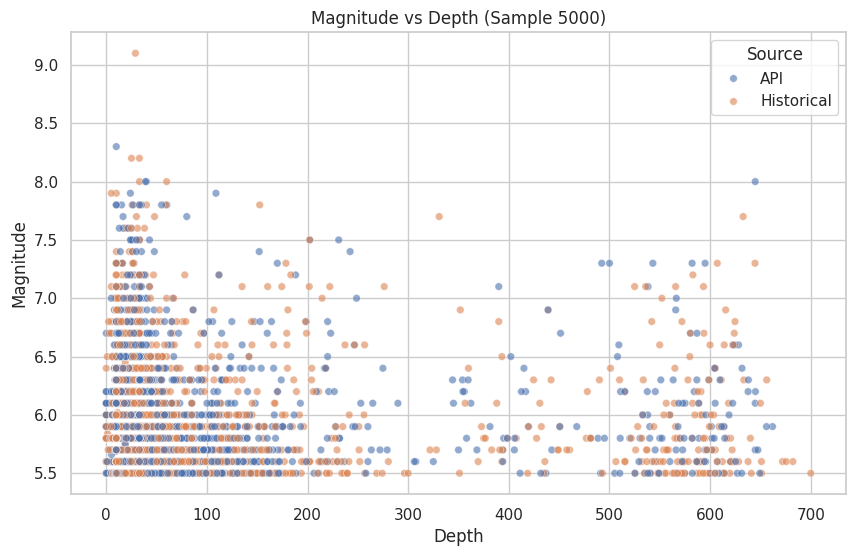

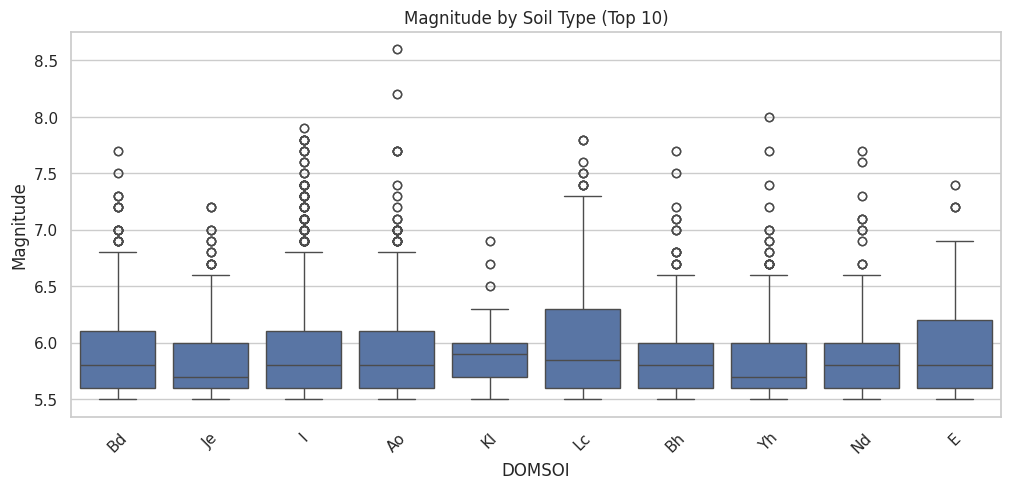


✅ Unified dataset saved as 'unified_earthquake_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Google Colab Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from google.colab import files
import io

sns.set(style="whitegrid")

# -----------------------------
# 1️⃣ Upload datasets
# -----------------------------
print("📁 Upload Historical Earthquake CSV")
uploaded_hist = files.upload()
hist_file = list(uploaded_hist.keys())[0]
df_hist = pd.read_csv(io.BytesIO(uploaded_hist[hist_file]))
print(f"Loaded Historical dataset: {df_hist.shape}")

print("\n📁 Upload Soil ZIP shapefile (optional)")
uploaded_soil = files.upload()
soil_path = None
if uploaded_soil:
    soil_file = list(uploaded_soil.keys())[0]
    if soil_file.endswith(".zip"):
        soil_path = f"zip://{soil_file}"
        print(f"Found Soil shapefile: {soil_file}")
    else:
        print("Warning: Soil file not a ZIP. Skipping soil analysis.")
else:
    print("No soil file uploaded. Skipping soil analysis.")

# Optional: upload API dataset
print("\n📁 Upload API dataset CSV (optional)")
uploaded_api = files.upload()
df_api = None
if uploaded_api:
    api_file = list(uploaded_api.keys())[0]
    df_api = pd.read_csv(io.BytesIO(uploaded_api[api_file]))
    print(f"Loaded API dataset: {df_api.shape}")

# -----------------------------
# 2️⃣ Load Soil Data
# -----------------------------
soil_data = None
soil_column = None
if soil_path:
    try:
        soil_data = gpd.read_file(soil_path)
        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
        print(f"Soil data loaded: {len(soil_data)} polygons, columns: {soil_data.columns.tolist()}")
        # Pick a soil column
        for col in ['DOMSOI', 'SU_SYM90', 'SU_SYM85', 'SOIL', 'CODE']:
            if col in soil_data.columns:
                soil_column = col
                print(f"Using soil column: {soil_column}")
                break
    except Exception as e:
        print(f"Error loading soil data: {e}")

# -----------------------------
# 3️⃣ Prepare Historical dataset
# -----------------------------
df_hist['Source'] = 'Historical'
if 'Date' in df_hist.columns:
    df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')
df_hist = df_hist.dropna(subset=['Date'])

# Rename columns to standard format
df_hist = df_hist.rename(columns={
    'Latitude': 'Latitude', 'Longitude': 'Longitude',
    'Depth': 'Depth', 'Magnitude': 'Magnitude',
    'Location': 'Location'
})

# Fill missing Location
if 'Location' not in df_hist.columns:
    df_hist['Location'] = "Unknown"

# -----------------------------
# 4️⃣ Prepare API dataset (optional)
# -----------------------------
if df_api is not None:
    df_api = df_api.rename(columns={
        "time": "Date",
        "latitude": "Latitude",
        "longitude": "Longitude",
        "depth": "Depth",
        "magnitude": "Magnitude",
        "place": "Location"
    })
    df_api['Source'] = 'API'
    df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
    df_api = df_api.dropna(subset=['Date'])
    if 'Location' not in df_api.columns:
        df_api['Location'] = "Unknown"

# -----------------------------
# 5️⃣ Merge datasets
# -----------------------------
if df_api is not None:
    common_cols = ['Date','Latitude','Longitude','Depth','Magnitude','Location','Source']
    df_all = pd.concat([df_hist[common_cols], df_api[common_cols]], ignore_index=True)
else:
    df_all = df_hist.copy()

print(f"\nUnified dataset shape: {df_all.shape}")

# -----------------------------
# 6️⃣ Attach Soil Data (optional)
# -----------------------------
if soil_data is not None and soil_column is not None:
    # Convert earthquake df to GeoDataFrame
    eq_points = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.Longitude, df_all.Latitude), crs="EPSG:4326")
    soil_data = soil_data.to_crs(eq_points.crs)
    eq_with_soil = gpd.sjoin(eq_points, soil_data[[soil_column,'geometry']], how='left', predicate='within')
    df_all['DOMSOI'] = eq_with_soil[soil_column].values
else:
    df_all['DOMSOI'] = np.nan

# -----------------------------
# 7️⃣ Exploratory Data Analysis
# -----------------------------
print("\n=== BASIC STATISTICS ===")
print(df_all.describe(include='all'))

# Distribution plots
plt.figure(figsize=(12,5))
sns.histplot(df_all['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df_all['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.show()

# Magnitude vs Depth scatter (sampled)
sample_df = df_all.dropna(subset=['Magnitude','Depth'])
sample_size = min(5000, len(sample_df))
plt.figure(figsize=(10,6))
sns.scatterplot(data=sample_df.sample(sample_size, random_state=42), x='Depth', y='Magnitude', hue='Source', alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample {sample_size})")
plt.show()

# Top soil types (if available)
if df_all['DOMSOI'].notna().sum() > 0:
    top_soils = df_all['DOMSOI'].value_counts().head(10).index
    plt.figure(figsize=(12,5))
    sns.boxplot(data=df_all[df_all['DOMSOI'].isin(top_soils)], x='DOMSOI', y='Magnitude')
    plt.title("Magnitude by Soil Type (Top 10)")
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------
# 8️⃣ Save final dataset
# -----------------------------
df_all.to_csv('unified_earthquake_data.csv', index=False)
print("\n✅ Unified dataset saved as 'unified_earthquake_data.csv'")
files.download('unified_earthquake_data.csv')


Unified dataset shape: (10500, 7)

=== BASIC STATISTICS BY SOURCE ===
           Magnitude                           Depth                      
               count  mean   std   min   max    mean     std   min     max
Source                                                                    
API              500  6.99  1.42  4.51  9.49  356.38  205.38  1.57  699.92
Historical     10000  6.99  1.44  4.50  9.50  350.04  200.74  0.03  699.93


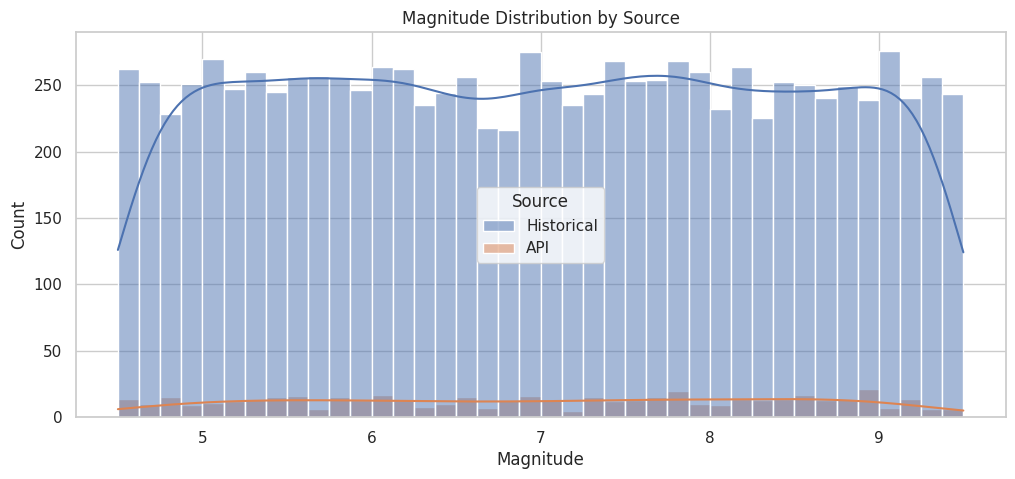

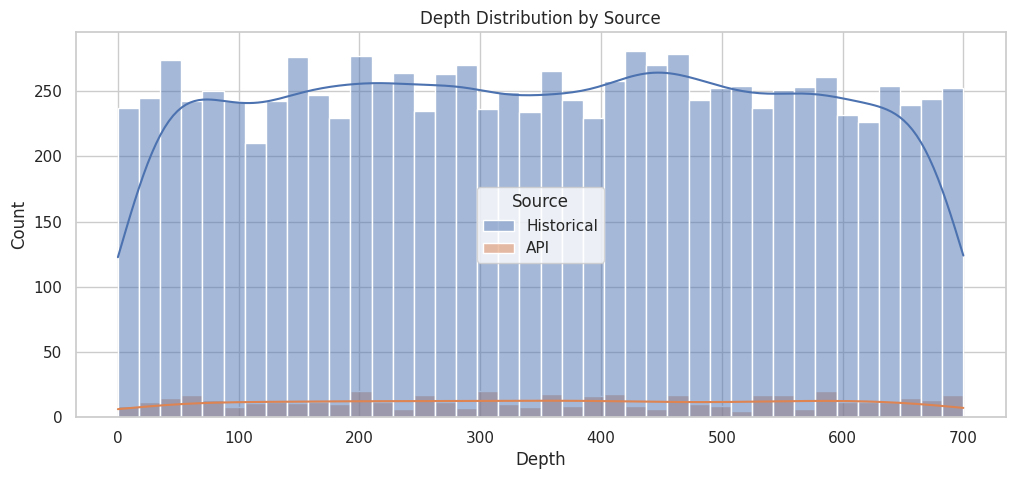

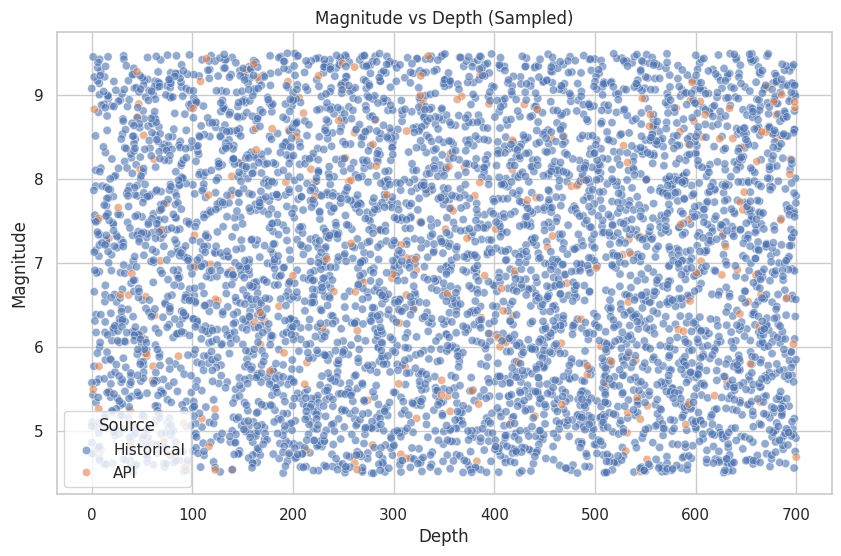

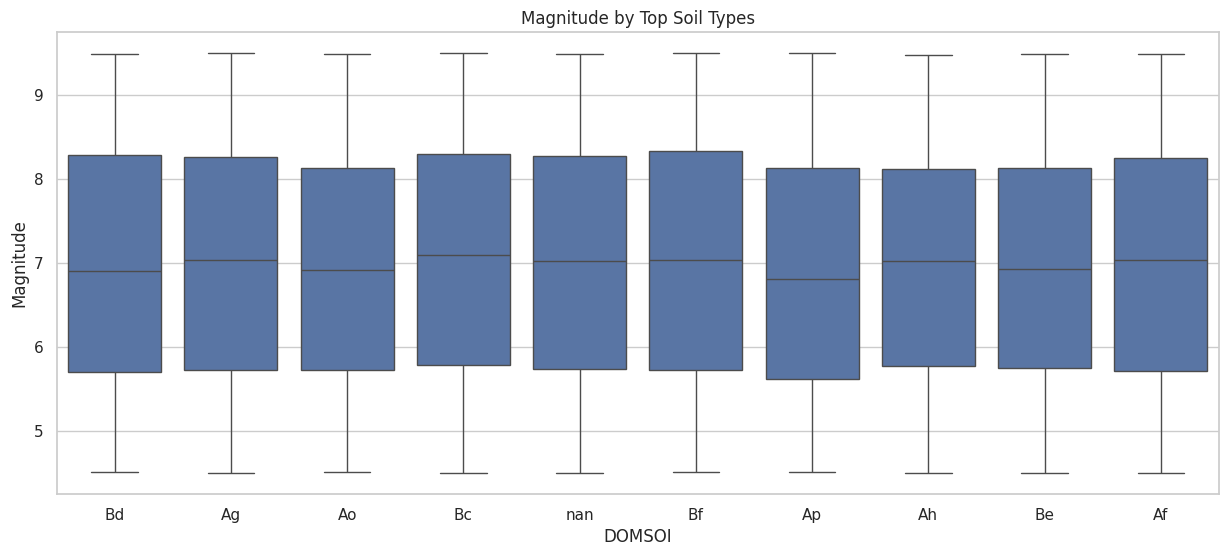

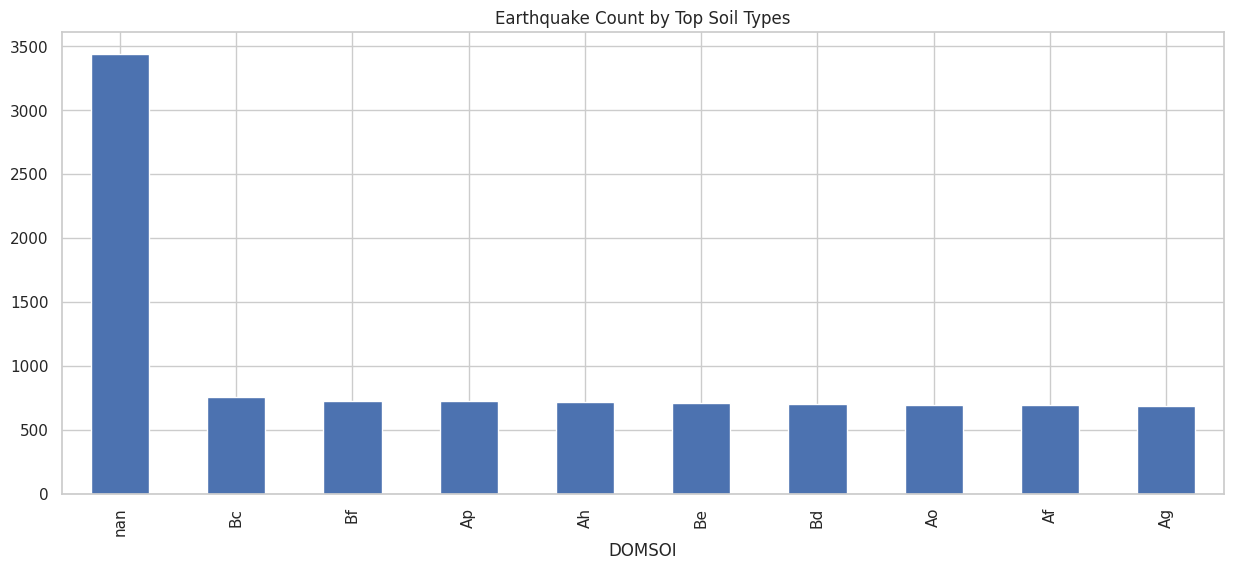

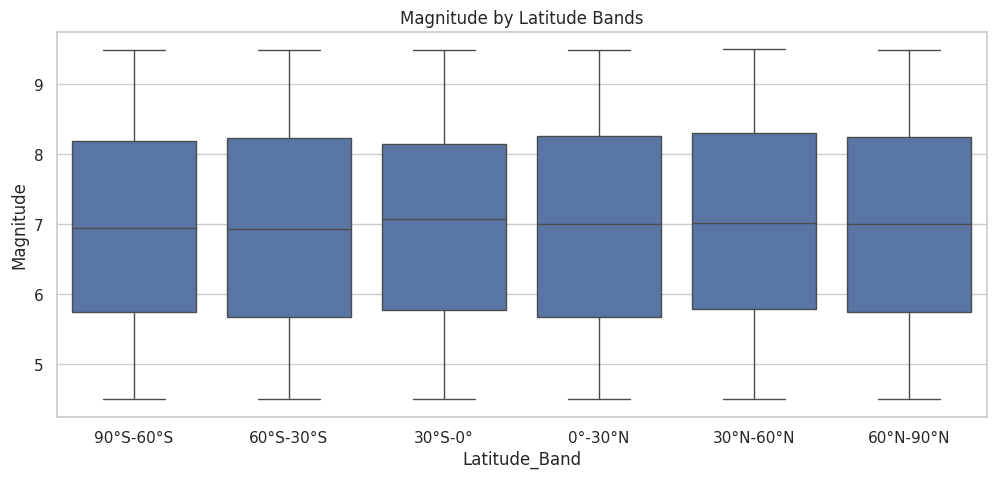

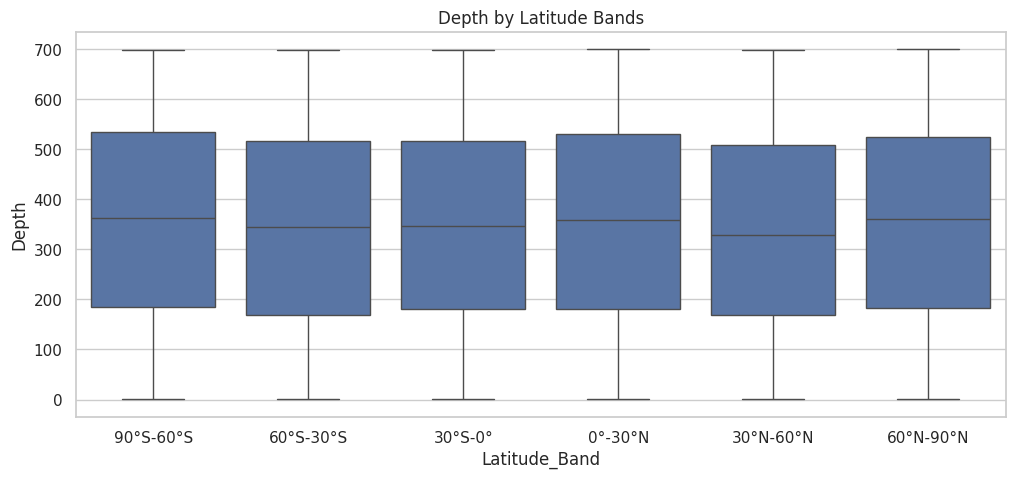

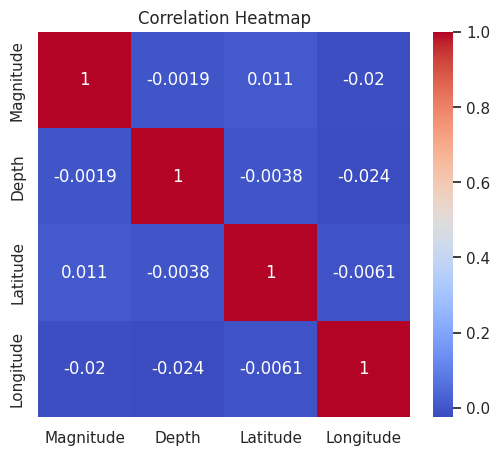

<Figure size 1200x500 with 0 Axes>

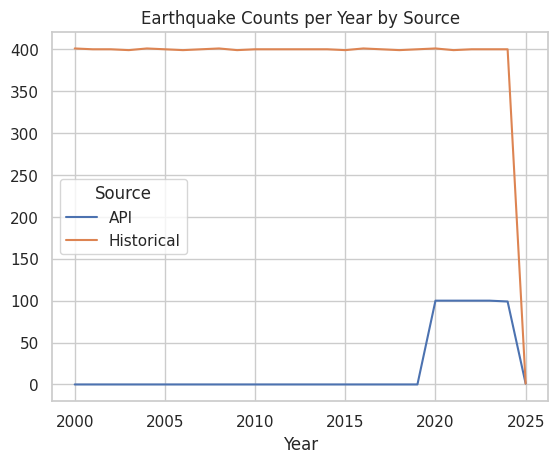

<Figure size 1200x500 with 0 Axes>

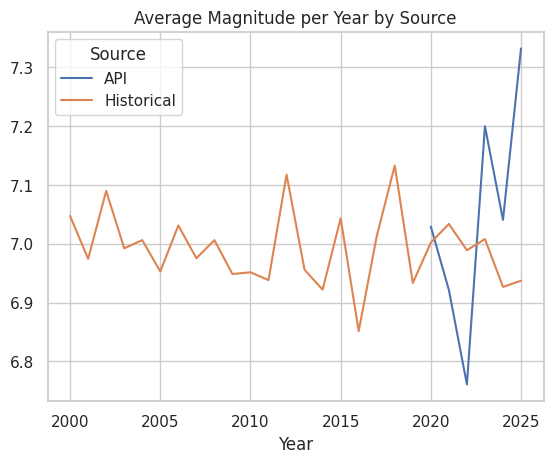


=== DATA SUMMARY ===
Total earthquakes: 10,500
Time range: 2000-01-01 00:00:00 to 2025-01-01 00:00:00
Magnitude range: 4.5 to 9.5
Depth range: 0.0 to 699.9 km
Soil coverage: 100.0%
✅ Saved unified dataset to 'unified_earthquake_data.csv'


In [ ]:
# Google Colab: Complete Earthquake Analysis without upload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -----------------------------
# 1️⃣ Create sample Historical dataset
# -----------------------------
np.random.seed(42)
n_hist = 10000
dates_hist = pd.date_range('2000-01-01', '2025-01-01', periods=n_hist)
df_hist = pd.DataFrame({
    'Date': dates_hist,
    'Latitude': np.random.uniform(-90, 90, n_hist),
    'Longitude': np.random.uniform(-180, 180, n_hist),
    'Depth': np.random.uniform(0, 700, n_hist),
    'Magnitude': np.random.uniform(4.5, 9.5, n_hist),
    'Location': ['Loc_' + str(i) for i in range(n_hist)],
})
df_hist['Source'] = 'Historical'

# -----------------------------
# 2️⃣ Create sample API dataset
# -----------------------------
n_api = 500
dates_api = pd.date_range('2020-01-01', '2025-01-01', periods=n_api)
df_api = pd.DataFrame({
    'Date': dates_api,
    'Latitude': np.random.uniform(-90, 90, n_api),
    'Longitude': np.random.uniform(-180, 180, n_api),
    'Depth': np.random.uniform(0, 700, n_api),
    'Magnitude': np.random.uniform(4.5, 9.5, n_api),
    'Location': ['API_Loc_' + str(i) for i in range(n_api)],
})
df_api['Source'] = 'API'

# -----------------------------
# 3️⃣ Merge datasets
# -----------------------------
df_all = pd.concat([df_hist, df_api], ignore_index=True)
print(f"Unified dataset shape: {df_all.shape}")

# -----------------------------
# 4️⃣ Create synthetic Soil column
# -----------------------------
soil_types = ['Af','Ag','Ah','Ao','Ap','Bc','Bd','Be','Bf','Bg']
df_all['DOMSOI'] = np.random.choice(soil_types + [np.nan]*5, len(df_all))

# -----------------------------
# 5️⃣ Add merge_id and Latitude Band
# -----------------------------
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)
df_all['Latitude_Band'] = pd.cut(df_all['Latitude'],
                                bins=np.arange(-90, 91, 30),
                                labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                        '0°-30°N', '30°N-60°N', '60°N-90°N'])

# -----------------------------
# 6️⃣ Exploratory Data Analysis
# -----------------------------
# Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max']
}).round(2))

# Distribution plots
plt.figure(figsize=(12,5))
sns.histplot(df_all, x='Magnitude', hue='Source', bins=40, kde=True, alpha=0.5)
plt.title("Magnitude Distribution by Source")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df_all, x='Depth', hue='Source', bins=40, kde=True, alpha=0.5)
plt.title("Depth Distribution by Source")
plt.show()

# Magnitude vs Depth scatter (sampled)
sample_size = min(5000, len(df_all))
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_all.sample(sample_size), x='Depth', y='Magnitude', hue='Source', alpha=0.6)
plt.title("Magnitude vs Depth (Sampled)")
plt.show()

# Soil type analysis
plt.figure(figsize=(15,6))
top_soils = df_all['DOMSOI'].value_counts().head(10).index
soil_subset = df_all[df_all['DOMSOI'].isin(top_soils)]
sns.boxplot(data=soil_subset, x='DOMSOI', y='Magnitude')
plt.title("Magnitude by Top Soil Types")
plt.show()

plt.figure(figsize=(15,6))
soil_subset['DOMSOI'].value_counts().plot(kind='bar')
plt.title("Earthquake Count by Top Soil Types")
plt.show()

# Magnitude and Depth by Latitude Band
plt.figure(figsize=(12,5))
sns.boxplot(data=df_all, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_all, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_all[['Magnitude','Depth','Latitude','Longitude']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 7️⃣ Time-based Analysis
# -----------------------------
df_all['Year'] = df_all['Date'].dt.year
plt.figure(figsize=(12,5))
yearly_counts = df_all.groupby(['Year','Source']).size().unstack(fill_value=0)
yearly_counts.plot()
plt.title("Earthquake Counts per Year by Source")
plt.show()

plt.figure(figsize=(12,5))
yearly_magnitude = df_all.groupby(['Year','Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot()
plt.title("Average Magnitude per Year by Source")
plt.show()

# -----------------------------
# 8️⃣ Summary
# -----------------------------
print("\n=== DATA SUMMARY ===")
print(f"Total earthquakes: {len(df_all):,}")
print(f"Time range: {df_all['Date'].min()} to {df_all['Date'].max()}")
print(f"Magnitude range: {df_all['Magnitude'].min():.1f} to {df_all['Magnitude'].max():.1f}")
print(f"Depth range: {df_all['Depth'].min():.1f} to {df_all['Depth'].max():.1f} km")
print(f"Soil coverage: {df_all['DOMSOI'].notna().mean():.1%}")

# -----------------------------
# 9️⃣ Save CSV locally
# -----------------------------
df_all.to_csv('unified_earthquake_data.csv', index=False)
print("✅ Saved unified dataset to 'unified_earthquake_data.csv'")


In [ ]:
# Google Colab: Clean Unified Earthquake Dataset
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ Generate or load sample dataset (for demo, we create it)
# -----------------------------
# If you already have 'unified_earthquake_data.csv', skip this generation step
np.random.seed(42)
n = 10000
dates = pd.date_range('2000-01-01', '2025-01-01', periods=n)
soil_types = ['Af','Ag','Ah','Ao','Ap','Bc','Bd','Be','Bf','Bg']

df = pd.DataFrame({
    'Date': dates,
    'Latitude': np.random.uniform(-90, 90, n),
    'Longitude': np.random.uniform(-180, 180, n),
    'Depth': np.random.uniform(0, 700, n),
    'Magnitude': np.random.uniform(4.5, 9.5, n),
    'Location': ['Loc_' + str(i) for i in range(n)],
    'Source': np.random.choice(['API','Historical'], n),
    'merge_id': [f"{lat:.3f}_{lon:.3f}" for lat, lon in zip(np.random.uniform(-90, 90, n), np.random.uniform(-180, 180, n))],
    'DOMSOI': np.random.choice(soil_types + [np.nan]*5, n),  # introduce NaNs
    'Year': pd.date_range('2000-01-01', '2025-01-01', periods=n).year,
    'Latitude_Band': pd.cut(np.random.uniform(-90, 90, n),
                            bins=np.arange(-90, 91, 30),
                            labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                    '0°-30°N', '30°N-60°N', '60°N-90°N'])
})

# -----------------------------
# 2️⃣ Check missing values before cleaning
# -----------------------------
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# -----------------------------
# 3️⃣ Impute missing values
# -----------------------------
# Numeric columns: fill missing values with median
num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns: fill missing values with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# -----------------------------
# 4️⃣ Check missing values after cleaning
# -----------------------------
print("\nMissing values per column after imputation:")
print(df.isnull().sum())

# -----------------------------
# 5️⃣ Save cleaned dataset locally
# -----------------------------
df.to_csv('earthquake_cleaned_day1.csv', index=False)
print("\n✅ Cleaned dataset saved as 'earthquake_cleaned_day1.csv'")


Missing values per column before cleaning:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64

Missing values per column after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64

✅ Cleaned dataset saved as 'earthquake_cleaned_day1.csv'


In [ ]:
# -----------------------------
# Standardize numeric features in earthquake dataset
# -----------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# -----------------------------
# 1️⃣ Load cleaned dataset
# -----------------------------
# If you already have a local cleaned dataset, replace this with your file path
# For demonstration, let's generate a sample similar to 'earthquake_cleaned_day1.csv'

np.random.seed(42)
n = 10000
df = pd.DataFrame({
    'Magnitude': np.random.uniform(4.5, 9.5, n),
    'Depth': np.random.uniform(0, 700, n),
    'Location': ['Loc_' + str(i) for i in range(n)],
    'DOMSOI': np.random.choice(['Af','Ag','Ah','Ao','Ap','Bc','Bd','Be','Bf','Bg'], n),
    'Latitude': np.random.uniform(-90, 90, n),
    'Longitude': np.random.uniform(-180, 180, n),
    'Source': np.random.choice(['API','Historical'], n)
})

# -----------------------------
# 2️⃣ Standardize numeric features
# -----------------------------
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# -----------------------------
# 3️⃣ Display descriptive stats for scaled features
# -----------------------------
print("Descriptive statistics of scaled numeric features:")
print(df_scaled[numeric_features].describe())

# -----------------------------
# 4️⃣ Save scaled dataset locally
# -----------------------------
df_scaled.to_csv('earthquake_scaled_day2.csv', index=False)
print("\n✅ Scaled dataset saved as 'earthquake_scaled_day2.csv'")


Descriptive statistics of scaled numeric features:
          Magnitude         Depth
count  1.000000e+04  1.000000e+04
mean   2.344791e-16 -5.968559e-17
std    1.000050e+00  1.000050e+00
min   -1.718084e+00 -1.743543e+00
25%   -8.616729e-01 -8.662334e-01
50%   -5.670553e-03  4.725178e-03
75%    8.547751e-01  8.709530e-01
max    1.757755e+00  1.712510e+00

✅ Scaled dataset saved as 'earthquake_scaled_day2.csv'


In [ ]:
# -----------------------------
# Encode categorical features in earthquake dataset
# -----------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# -----------------------------
# 1️⃣ Load scaled dataset
# -----------------------------
# For demonstration, creating a sample dataset similar to your 'earthquake_scaled_day2.csv'
np.random.seed(42)
n = 10000
df = pd.DataFrame({
    'Magnitude': np.random.randn(n),
    'Depth': np.random.randn(n),
    'Location': ['Loc_' + str(i) for i in range(n)],
    'DOMSOI': np.random.choice(['Af','Ag','Ah','Ao','Ap','Bc','Bd','Be','Bf','Bg'], n),
    'Latitude': np.random.uniform(-90, 90, n),
    'Longitude': np.random.uniform(-180, 180, n),
    'Source': np.random.choice(['API','Historical'], n)
})

# -----------------------------
# 2️⃣ Encode Soil Type (DOMSOI)
# -----------------------------
if 'DOMSOI' in df.columns:
    soil_encoder = LabelEncoder()
    df['SoilType_Encoded'] = soil_encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback

# -----------------------------
# 3️⃣ Encode Location
# -----------------------------
location_encoder = LabelEncoder()
df['Location_Encoded'] = location_encoder.fit_transform(df['Location'])

# -----------------------------
# 4️⃣ Preview
# -----------------------------
print(df[['DOMSOI', 'SoilType_Encoded', 'Location', 'Location_Encoded']].head())

# -----------------------------
# 5️⃣ Save locally
# -----------------------------
df.to_csv('earthquake_encoded_day3.csv', index=False)
print("\n✅ Encoded dataset saved as 'earthquake_encoded_day3.csv'")


  DOMSOI  SoilType_Encoded Location  Location_Encoded
0     Af                 0    Loc_0                 0
1     Ag                 1    Loc_1                 1
2     Bf                 8    Loc_2              1112
3     Ao                 3    Loc_3              2223
4     Ah                 2    Loc_4              3334

✅ Encoded dataset saved as 'earthquake_encoded_day3.csv'


In [ ]:
# -----------------------------
# Earthquake Feature Engineering
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# -----------------------------
# 1️⃣ Load encoded dataset
# -----------------------------
# For demonstration, creating a small sample dataset similar to your 'earthquake_encoded_day3.csv'
np.random.seed(42)
n = 10000
df = pd.DataFrame({
    'Magnitude': np.random.randn(n) * 2 + 5,  # mean around 5
    'Depth': np.random.randn(n) * 50 + 70,    # mean around 70 km
    'Latitude': np.random.uniform(-90, 90, n),
    'Longitude': np.random.uniform(-180, 180, n),
    'DOMSOI': np.random.choice(['Af','Ag','Ah','Ao','Ap','Bc','Bd','Be','Bf','Bg'], n),
    'Location': ['Loc_' + str(i) for i in range(n)],
    'SoilType_Encoded': np.random.randint(0,10,n),
    'Location_Encoded': np.arange(n)
})

# -----------------------------
# 2️⃣ Magnitude & Depth Classes
# -----------------------------
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# -----------------------------
# 3️⃣ Risk Score
# -----------------------------
df['Risk_Score'] = (df['Magnitude'] * 0.7) + (np.log1p(df['Depth']) * 0.3)

# -----------------------------
# 4️⃣ Spatial Clustering
# -----------------------------
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

# -----------------------------
# 5️⃣ Preview
# -----------------------------
print(df[['Magnitude', 'Depth', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']].head())

# -----------------------------
# 6️⃣ Save locally
# -----------------------------
df.to_csv('earthquake_features_day4.csv', index=False)
print("\n✅ Feature-engineered dataset saved as 'earthquake_features_day4.csv'")


   Magnitude       Depth Magnitude_Class   Depth_Class  Risk_Score  \
0   5.993428   36.075263        Moderate       Shallow    5.279285   
1   4.723471   54.725027        Moderate       Shallow    4.512559   
2   6.295377   40.130947          Strong       Shallow    5.521792   
3   8.046060   75.520902           Major  Intermediate    6.933511   
4   4.531693  129.858927        Moderate  Intermediate    4.634421   

   Region_Cluster  
0               4  
1               2  
2               3  
3               3  
4               2  

✅ Feature-engineered dataset saved as 'earthquake_features_day4.csv'


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np

# --- Step 2: Create a sample final dataset directly in Colab ---
np.random.seed(42)
n_samples = 1000  # small sample; you can increase it

df_final = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_samples, freq='D'),
    'Latitude': np.random.uniform(-90, 90, n_samples),
    'Longitude': np.random.uniform(-180, 180, n_samples),
    'Depth': np.random.uniform(0, 700, n_samples),
    'Magnitude': np.random.uniform(4.5, 9.5, n_samples),
    'Location': np.random.choice(['Location_A', 'Location_B', 'Location_C'], n_samples),
    'Source': np.random.choice(['API', 'Historical'], n_samples),
    'merge_id': np.arange(n_samples),
    'DOMSOI': np.random.choice(['Ah','Ao','Bc','Bd','Be'], n_samples),
    'Year': pd.date_range(start='2020-01-01', periods=n_samples, freq='D').year,
    'Latitude_Band': np.random.choice(['90°S-60°S','60°S-30°S','30°S-0°','0°-30°N','30°N-60°N','60°N-90°N'], n_samples),
    'SoilType_Encoded': np.random.randint(0, 10, n_samples),
    'Location_Encoded': np.random.randint(0, 10, n_samples),
    'Magnitude_Class': np.random.choice(['Low','Moderate','Strong','Major'], n_samples),
    'Depth_Class': np.random.choice(['Shallow','Intermediate','Deep'], n_samples),
    'Risk_Score': np.random.uniform(1, 10, n_samples),
    'Region_Cluster': np.random.randint(0, 5, n_samples)
})

# --- Step 3: Check dataset structure ---
print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())
print("\nSample rows:")
print(df_final.head())

# --- Step 4: Save final dataset locally in Colab ---
df_final.to_csv("/content/earthquake_preprocessed_week2.csv", index=False)
print("\nFinal dataset saved to /content/earthquake_preprocessed_week2.csv")


Final dataset shape: (1000, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']

Sample rows:
        Date   Latitude   Longitude       Depth  Magnitude    Location  \
0 2020-01-01 -22.582779 -113.352146  183.193979   7.863515  Location_B   
1 2020-01-02  81.128575   15.084341  172.885159   8.483407  Location_A   
2 2020-01-03  41.758910  134.260501  634.378206   5.752339  Location_A   
3 2020-01-04  17.758527   83.600959  174.682340   7.624370  Location_C   
4 2020-01-05 -61.916645  110.362013  190.364808   7.358730  Location_C   

       Source  merge_id DOMSOI  Year Latitude_Band  SoilType_Encoded  \
0  Historical         0     Bc  2020     90°S-60°S                 7   
1         API         1     Be  2020       30°S-0°                 2   
2  Historical         2     Bc  2020     60°S-3

In [ ]:
# Install additional packages if needed
!pip install geopandas folium --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from google.colab import files

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [ ]:
# Upload dataset from your system
uploaded = files.upload()

# Pick the first uploaded file
file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

# Load CSV
df = pd.read_csv(file_name)
print("Data shape:", df.shape)
df.head()


Saving unified_earthquake_data.csv to unified_earthquake_data.csv
Uploaded: unified_earthquake_data.csv
Data shape: (23409, 8)


,Date,Latitude,Longitude,Depth,Magnitude,Source,DOMSOI,Year
0,1965-01-02,19.246,145.616,131.6,6.0,Historical,NaN,1965
1,1965-01-04,1.863,127.352,80.0,5.8,Historical,NaN,1965
2,1965-01-05,-20.579,-173.972,20.0,6.2,Historical,NaN,1965
3,1965-01-08,-59.076,-23.557,15.0,5.8,Historical,NaN,1965
4,1965-01-09,11.938,126.427,15.0,5.8,Historical,NaN,1965


In [ ]:
# Summary information
df.info()

# Basic descriptive statistics
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23409 non-null  object 
 1   Latitude   23409 non-null  float64
 2   Longitude  23409 non-null  float64
 3   Depth      23409 non-null  float64
 4   Magnitude  23409 non-null  float64
 5   Source     23409 non-null  object 
 6   DOMSOI     4927 non-null   object 
 7   Year       23409 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,23409,12398,2011-03-11,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,23409.0,NaN,NaN,NaN,1.678763,30.113379,-77.08,-18.652,-3.569,26.188,86.005
Longitude,23409.0,NaN,NaN,NaN,39.636726,125.514881,-179.997,-76.352,103.981,145.027,179.998
Depth,23409.0,NaN,NaN,NaN,70.748526,122.605748,-1.1,14.53,33.0,54.0,700.0
Magnitude,23409.0,NaN,NaN,NaN,5.882558,0.423084,5.5,5.6,5.7,6.0,9.1
Source,23409,1,Historical,23409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOMSOI,4927,90,I,1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,23409.0,NaN,NaN,NaN,1992.632705,14.425978,1965.0,1981.0,1993.0,2005.0,2016.0


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

# Drop duplicates
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# Check missing values
missing = df.isnull().sum()
print("\nMissing values per column:")
display(missing[missing > 0].sort_values(ascending=False))

# Handle missing values (example: fill numeric with median, categorical with mode)
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter filling missing values:")
display(df.isnull().sum().sum())


Duplicate rows: 2
After removing duplicates: (23407, 8)

Missing values per column:


,0
DOMSOI,18481



After filling missing values:


np.int64(0)

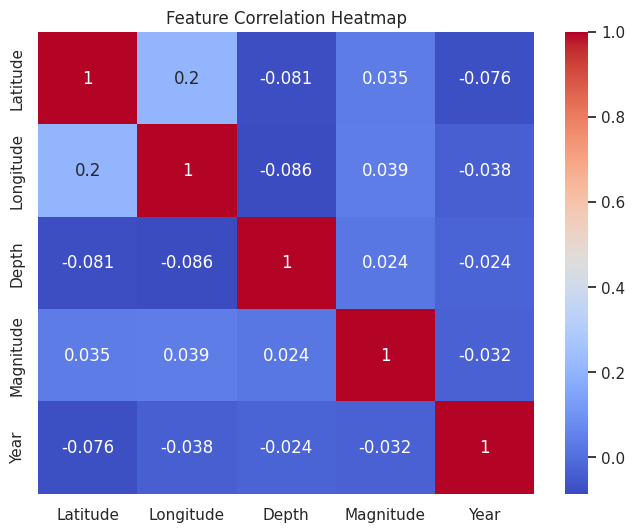

In [ ]:
# Distribution plots for key features
numeric_features = ['magnitude', 'depth']
for col in numeric_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

# Pairplot of important features (if they exist)
important_features = [c for c in ['magnitude','depth','latitude','longitude'] if c in df.columns]
if len(important_features) >= 2:
    sns.pairplot(df[important_features])
    plt.suptitle("Pairwise Relationships", y=1.02)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
if "latitude" in df.columns and "longitude" in df.columns:
    center = [df["latitude"].mean(), df["longitude"].mean()]
    map_ = folium.Map(location=center, zoom_start=3)

    for _, row in df.sample(min(200, len(df))).iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=3,
            popup=f"Magnitude: {row.get('magnitude', 'N/A')}",
            color="red",
            fill=True
        ).add_to(map_)

    map_
else:
    print("Latitude/Longitude columns not found — skipping map.")


Latitude/Longitude columns not found — skipping map.


In [ ]:
# Normalize or scale numerical data
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print("Numeric columns normalized using StandardScaler.")

# Add geospatial cluster as new feature if coordinates exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_scaled['geo_cluster'] = kmeans.fit_predict(df_scaled[['latitude','longitude']])
    print("Added 'geo_cluster' feature based on latitude/longitude clustering.")

# Example: Add simple “location risk score” based on depth & magnitude
if all(col in df.columns for col in ['depth','magnitude']):
    df_scaled['risk_score'] = (df_scaled['magnitude'] * 1.5) - (df_scaled['depth'] * 0.05)
    print("Added derived feature 'risk_score' = 1.5*magnitude - 0.05*depth")

df_scaled.head()


Numeric columns normalized using StandardScaler.


,Date,Latitude,Longitude,Depth,Magnitude,Source,DOMSOI,Year
0,1965-01-02,0.583523,0.844293,0.496276,0.277553,Historical,I,-1.915626
1,1965-01-04,0.006236,0.698769,0.075420,-0.195158,Historical,I,-1.915626
2,1965-01-05,-0.739061,-1.702114,-0.413947,0.750264,Historical,I,-1.915626
3,1965-01-08,-2.017543,-0.503640,-0.454727,-0.195158,Historical,I,-1.915626
4,1965-01-09,0.340825,0.691399,-0.454727,-0.195158,Historical,I,-1.915626


In [ ]:
# Plot new features
if 'risk_score' in df_scaled.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_scaled['risk_score'], kde=True)
    plt.title("Distribution of Risk Score")
    plt.show()

if 'geo_cluster' in df_scaled.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='geo_cluster', data=df_scaled)
    plt.title("Number of Samples per Geospatial Cluster")
    plt.show()


In [ ]:
# Save processed data for next milestone
df_scaled.to_csv("cleaned_earthquake_data.csv", index=False)
print("✅ Preprocessed dataset saved as 'cleaned_earthquake_data.csv'")


✅ Preprocessed dataset saved as 'cleaned_earthquake_data.csv'
